# OMSCS CS7641
# Machine Learning
# Allan Hammer
# Project 1

### Why?
The purpose of this project is to explore some techniques in supervised learning. It is important to realize that understanding an algorithm or technique requires understanding how it behaves under a variety of circumstances. As such, you will be asked to "implement" some simple learning algorithms (for sufficiently small values of implement, meaning I don't really want you to implement anything at all), and to compare their performance...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

## Dataset 1: Adult Incomes

In [2]:
# dataset 1
# https://www.kaggle.com/wenruliu/adult-income-dataset
dat = pd.read_csv("adult.csv")

In [3]:
dat.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
dat['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [5]:
print("Blind guessing should get you a minimum of: ", (37155/(37155+11687))*100, "% accuracy.")

Blind guessing should get you a minimum of:  76.07182343065395 % accuracy.


In [6]:
data = pd.get_dummies(dat)

In [7]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [8]:
# things to note:
# 1) lots of values near 0 and lots of values in the tens of thousands - how will this affect weighting?
# 2) dimensionality needed to be expanded grealy for the dummies - curse?
# 3) lots of correlated data as a result of the domain and dummy classes - will this  affect certain algorithms?
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.057307,0.029319,0.064207,0.000205,...,0.000430,0.002355,0.001331,0.000614,0.000553,0.897424,0.001761,0.000471,0.760718,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.232431,0.168701,0.245124,0.014307,...,0.020731,0.048467,0.036457,0.024776,0.023506,0.303407,0.041925,0.021695,0.426649,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
y = data['income_>50K']
X = data.drop(['income_>50K', 'income_<=50K'], axis=1)

# split into train and test (we will use the test for all final testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05)

In [10]:
# LEARNING CURVES
validation_sizes = [.05, .10, .20, .33, .5]

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

***Note: For the sections below, each model section can be run independently since there are huge time differences in implementation.***

## Decision Tree

In [12]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [13]:
train_accuracy = []
val_accuracy = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5, random_state=20170826)
    
    tree.fit(X_train_new, y_train_new)
    
    predictions_train = tree.predict(X_train_new)
    predictions_val = tree.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


In [14]:
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

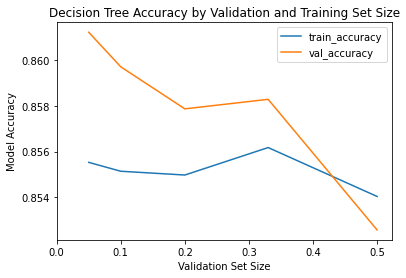

In [15]:
plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('Decision Tree Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

***Best validation set size for the hyperparameters: 0.5 - This means a k of 2 for k-fold cross validation.***

In [16]:
# first we do pruning - max depth parameter
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

scores_train = []
scores_val = []

for i in range(10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depths[i], random_state=20170826)

    scores = cross_validate(tree, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 10.")

Completed Round 1 of 10.
Completed Round 2 of 10.
Completed Round 3 of 10.
Completed Round 4 of 10.
Completed Round 5 of 10.
Completed Round 6 of 10.
Completed Round 7 of 10.
Completed Round 8 of 10.
Completed Round 9 of 10.
Completed Round 10 of 10.


In [17]:
depths_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'max_depths': max_depths}
)

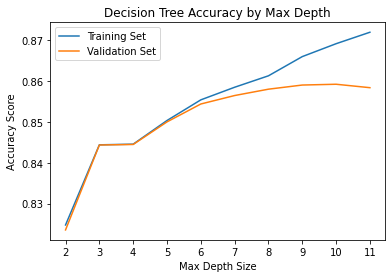

In [18]:
plt.plot(depths_df["max_depths"], depths_df[["scores_train", "scores_val"]])
plt.xlabel('Max Depth Size')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Accuracy by Max Depth')
plt.xticks(np.arange(2,12))
plt.legend(["Training Set", "Validation Set"])
plt.show()

***Chosen max depth size for the test set: 6.***

In [19]:
# let's try one more parameter - 
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

scores_train = []
scores_val = []

for i in range(10):
    tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf[i], random_state=20170826)

    scores = cross_validate(tree, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 10.")

Completed Round 1 of 10.
Completed Round 2 of 10.
Completed Round 3 of 10.
Completed Round 4 of 10.
Completed Round 5 of 10.
Completed Round 6 of 10.
Completed Round 7 of 10.
Completed Round 8 of 10.
Completed Round 9 of 10.
Completed Round 10 of 10.


In [20]:
leafs_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'min_leafs': min_samples_leaf}
)

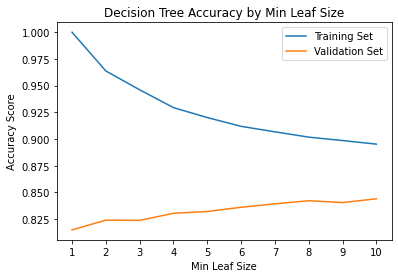

In [21]:
plt.plot(leafs_df["min_leafs"], leafs_df[["scores_train", "scores_val"]])
plt.xlabel('Min Leaf Size')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Accuracy by Min Leaf Size')
plt.xticks(np.arange(1,11))
plt.legend(["Training Set", "Validation Set"])
plt.show()

***Chosen min leaf size for the test set: 10.***

In [22]:
# according to this, our best parameters are a max depth of 6 and a min leaf size of 10, with some variation
start = time.time()

param_grid = {'max_depth': np.arange(2,12),
              'min_samples_leaf': np.arange(1,11)}

tree_final = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=20170826), param_grid=param_grid)
tree_final.fit(X_train, y_train)
predictions = tree_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final Decision Tree Test Accuracy:", final_score)
print("Best Params from Grid Search:", tree_final.best_params_)

Time to use Grid Search: 1.4566603899002075 minutes
Final Decision Tree Test Accuracy: 0.8514121981170691
Best Params from Grid Search: {'max_depth': 9, 'min_samples_leaf': 8}


In [23]:
print("Final tree accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final tree accuracy is performing 11.922149321582259 % better than the baseline of blind guessing.


## Neural Networks

In [24]:
## Neural Networks
from sklearn.neural_network import MLPClassifier

In [25]:
train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


In [26]:
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

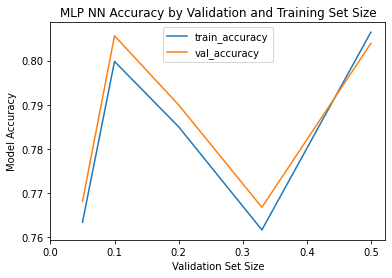

In [27]:
plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

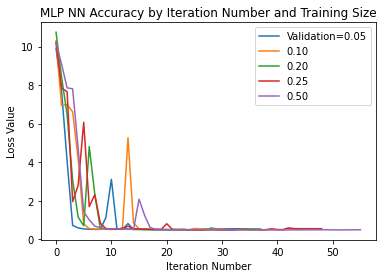

In [28]:
for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.1 - This means a k of 10 for k-fold cross validation.***

In [29]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


In [30]:
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))

In [31]:
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

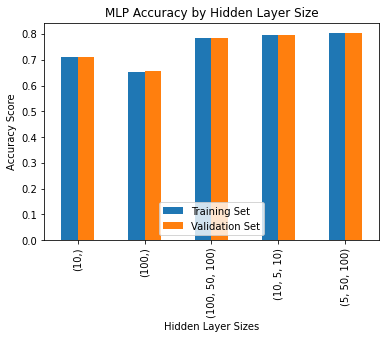

In [32]:
hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (5,10,100). 3 of them performed similarly though.***

In [33]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


In [34]:
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))

In [35]:
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

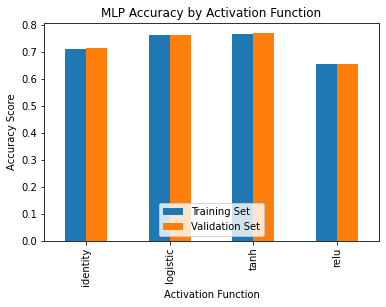

In [36]:
activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: tanh.***

In [37]:
# according to this, our best parameters are a hidden layer size of (5,10,100) and an activtion function of identity, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 9.703919545809429 minutes
Final MLP Test Accuracy: 0.8268522308636922
Best Params from Grid Search: {'activation': 'identity', 'hidden_layer_sizes': (5, 50, 100)}


In [38]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing 8.6936257834597 % better than the baseline of blind guessing.


## Boosting

In [39]:
## BOOSTING
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
train_accuracy = []
val_accuracy = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    boost = GradientBoostingClassifier(max_depth=3, min_samples_leaf=2, random_state=20170826)
    
    boost.fit(X_train_new, y_train_new)
    
    predictions_train = boost.predict(X_train_new)
    predictions_val = boost.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


In [41]:
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

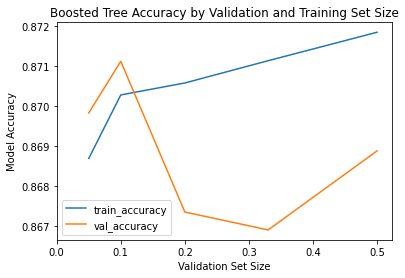

In [42]:
plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('Boosted Tree Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

***Best validation set size for the hyperparameters: 0.1 - This means a k of 10 for k-fold cross validation.***

In [43]:
# first we do pruning - max depth parameter
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

scores_train = []
scores_val = []

for i in range(10):
    boost = GradientBoostingClassifier(max_depth=max_depths[i], random_state=20170826)

    scores = cross_validate(boost, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 10.")

Completed Round 1 of 10.
Completed Round 2 of 10.
Completed Round 3 of 10.
Completed Round 4 of 10.
Completed Round 5 of 10.
Completed Round 6 of 10.
Completed Round 7 of 10.
Completed Round 8 of 10.
Completed Round 9 of 10.
Completed Round 10 of 10.


In [44]:
boosted_depths_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'max_depths': max_depths}
)

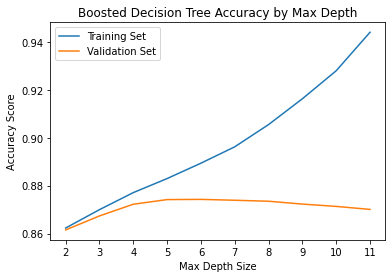

In [45]:
plt.plot(boosted_depths_df["max_depths"], boosted_depths_df[["scores_train", "scores_val"]])
plt.xlabel('Max Depth Size')
plt.ylabel('Accuracy Score')
plt.title('Boosted Decision Tree Accuracy by Max Depth')
plt.xticks(np.arange(2,12))
plt.legend(["Training Set", "Validation Set"])
plt.show()

***Chosen max depth size for the test set: 2.***

In [46]:
# let's try one more parameter - 
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

scores_train = []
scores_val = []

for i in range(10):
    boost = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf[i], random_state=20170826)

    scores = cross_validate(boost, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 10.")

Completed Round 1 of 10.
Completed Round 2 of 10.
Completed Round 3 of 10.
Completed Round 4 of 10.
Completed Round 5 of 10.
Completed Round 6 of 10.
Completed Round 7 of 10.
Completed Round 8 of 10.
Completed Round 9 of 10.
Completed Round 10 of 10.


In [47]:
boosted_leafs_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'min_leafs': min_samples_leaf}
)

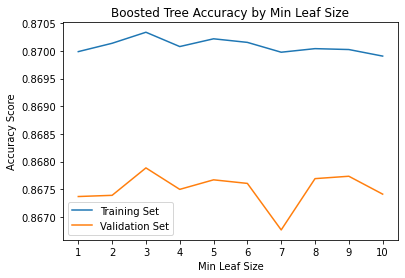

In [48]:
plt.plot(boosted_leafs_df["min_leafs"], boosted_leafs_df[["scores_train", "scores_val"]])
plt.xlabel('Min Leaf Size')
plt.ylabel('Accuracy Score')
plt.title('Boosted Tree Accuracy by Min Leaf Size')
plt.xticks(np.arange(1,11))
plt.legend(["Training Set", "Validation Set"])
plt.show()

***Chosen min leaf size for the test set: any...let's say 10. They're all bad.***

In [49]:
# according to this, our best parameters are a max depth of 2 and a min leaf size of 10, with some variation
start = time.time()

param_grid = {'max_depth': np.arange(2,12),
              'min_samples_leaf': np.arange(1,11)}

boost_final = GridSearchCV(GradientBoostingClassifier(random_state=20170826), param_grid=param_grid)
boost_final.fit(X_train, y_train)
predictions = boost_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final Boosted Tree Test Accuracy:", final_score)
print("Best Params from Grid Search:", boost_final.best_params_)

Time to use Grid Search: 107.95110465288163 minutes
Final Boosted Tree Test Accuracy: 0.8649201801064266
Best Params from Grid Search: {'max_depth': 6, 'min_samples_leaf': 3}


In [50]:
print("Final boosted tree accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final boosted tree accuracy is performing 13.697837267549682 % better than the baseline of blind guessing.


## SVM

***SVM for this dataset requires me to hardcode the max_iter hyperparameter; more on this in the report.***.

In [51]:
## SVM
from sklearn.svm import SVC

In [52]:
train_accuracy = []
val_accuracy = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    svm = SVC(kernel='rbf', max_iter=1000, random_state=20170826)
    
    svm.fit(X_train_new, y_train_new)
    
    predictions_train = svm.predict(X_train_new)
    predictions_val = svm.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


In [53]:
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

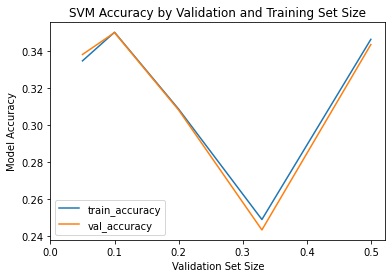

In [54]:
plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('SVM Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

***Best validation set size for the hyperparameters: 0.1 - This means a k of 10 for k-fold cross validation.***

In [55]:
# first we do kernel types
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

scores_train = []
scores_val = []

for i in range(4):
    svm = SVC(kernel=kernel[i], max_iter=1000, random_state=20170826)

    scores = cross_validate(svm, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 4.")

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


In [56]:
kernel_cats = []
for i in range(4):
    kernel_cats.append(str(kernel[i]))

In [57]:
kernels_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'kernel': kernel_cats}
)
kernels_df['kernel'] = kernels_df['kernel'].astype('category')

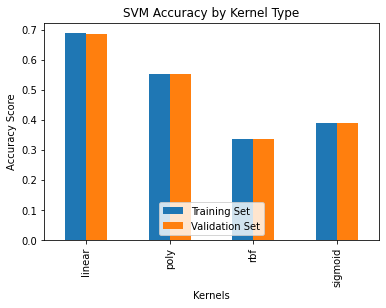

In [58]:
kernels_df.plot.bar(x="kernel")
plt.xlabel('Kernels')
plt.ylabel('Accuracy Score')
plt.title('SVM Accuracy by Kernel Type')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Kernel for the test set: linear.***

In [59]:
# let's try one more parameter - 
max_iter = [5, 50, 100, 500, 1000]

scores_train = []
scores_val = []

for i in range(5):
    svm = SVC(max_iter=max_iter[i], random_state=20170826)

    scores = cross_validate(svm, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 5.")

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


In [60]:
iter_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'max_iter': max_iter}
)

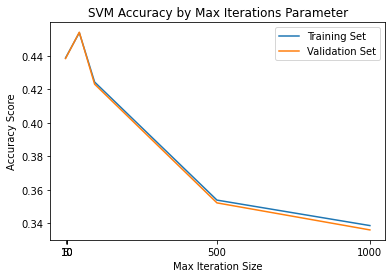

In [61]:
plt.plot(iter_df["max_iter"], iter_df[["scores_train", "scores_val"]])
plt.xlabel('Max Iteration Size')
plt.ylabel('Accuracy Score')
plt.title('SVM Accuracy by Max Iterations Parameter')
plt.xticks([5,10,10,500,1000])
plt.legend(["Training Set", "Validation Set"])
plt.show()

***Chosen max iter size for the test set: 500.***

***Note that the final metric below is with a hard stop of 1000 iterations at most. This needed to be set as the SVM code will always time out locally for me with a max_iter value of -1. The dataset is too large for computing anything more than 5 digits in this parameter, so the time metric should be ignored if possible***.

In [62]:
# according to this, our best parameters are a kernel of linear and a degree size of 3, with some variation
start = time.time()

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'max_iter': [5, 50, 100, 500, 1000]}

svm_final = GridSearchCV(SVC(random_state=20170826), param_grid=param_grid)
svm_final.fit(X_train, y_train)
predictions = svm_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final SVM Test Accuracy:", final_score)
print("Best Params from Grid Search:", svm_final.best_params_)

Time to use Grid Search: 2.142157475153605 minutes
Final SVM Test Accuracy: 0.7548096602537864
Best Params from Grid Search: {'kernel': 'linear', 'max_iter': 50}


In [63]:
print("Final boosted tree accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final boosted tree accuracy is performing -0.7767099283664879 % better than the baseline of blind guessing.


## KNN

In [64]:
## KNN
from sklearn.neighbors import KNeighborsClassifier

In [65]:
train_accuracy = []
val_accuracy = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
    
    knn.fit(X_train_new, y_train_new)
    
    predictions_train = knn.predict(X_train_new)
    predictions_val = knn.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


In [66]:
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

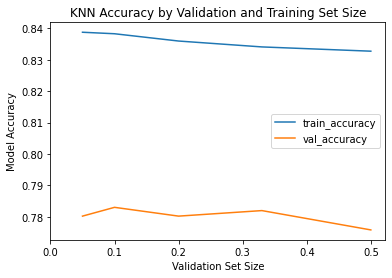

In [67]:
plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('KNN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

***Best validation set size for the hyperparameters: 0.2 - This means a k of 5 for k-fold cross validation.***

In [68]:
# first we do neighbors - n_neighbors parameter
n_neighbors = np.arange(1,11)

scores_train = []
scores_val = []

for i in range(10):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors[i])

    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 10.")

Completed Round 1 of 10.
Completed Round 2 of 10.
Completed Round 3 of 10.
Completed Round 4 of 10.
Completed Round 5 of 10.
Completed Round 6 of 10.
Completed Round 7 of 10.
Completed Round 8 of 10.
Completed Round 9 of 10.
Completed Round 10 of 10.


In [69]:
neighbors_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'n_neighbors': n_neighbors}
)

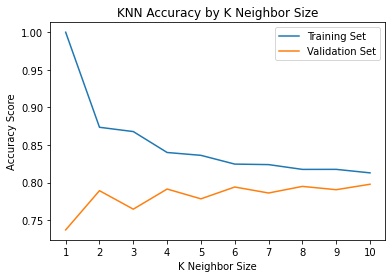

In [70]:
plt.plot(neighbors_df["n_neighbors"], neighbors_df[["scores_train", "scores_val"]])
plt.xlabel('K Neighbor Size')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy by K Neighbor Size')
plt.xticks(np.arange(1,11))
plt.legend(["Training Set", "Validation Set"])
plt.show()

***Chosen K neighbors size for the test set: 10.***

In [71]:
# let's try one more parameter - 
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

scores_train = []
scores_val = []

for i in range(4):
    knn = KNeighborsClassifier(metric=metric[i])

    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


In [72]:
metric_cats = []
for i in range(4):
    metric_cats.append(str(metric[i]))

In [73]:
metrics_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'metric': metric_cats}
)
metrics_df['metric'] = metrics_df['metric'].astype('category')

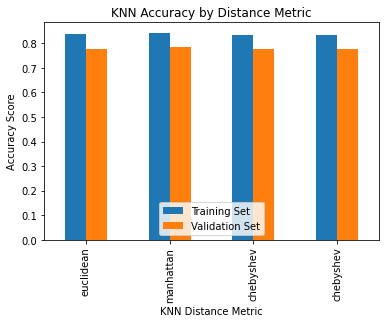

In [74]:
metrics_df.plot.bar(x="metric")
plt.xlabel('KNN Distance Metric')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy by Distance Metric')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Distance Metric for the test set: manhattan.***

***Similarly to SVMs, and since all distance metrics look to have performed the same for this dataset, I had to reduce the grid search in the final output to just one metric (manhattan) - the code will keep timing out otherwise. The final metric of time for all four will technically be around 4 times of what is displayed below.***

In [75]:
# according to this, our best parameters are a K neighbors size of 5 and a distance metric of manhattan, with some variation
start = time.time()

param_grid = {'metric': ['manhattan'],
              'n_neighbors':np.arange(1,11)}

knn_final = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
knn_final.fit(X_train, y_train)
predictions = knn_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final KNN Test Accuracy:", final_score)
print("Best Params from Grid Search:", knn_final.best_params_)

Time to use Grid Search: 43.554871221383415 minutes
Final KNN Test Accuracy: 0.7986082685223086
Best Params from Grid Search: {'metric': 'manhattan', 'n_neighbors': 10}


In [76]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing 4.980823714618742 % better than the baseline of blind guessing.


***Models on this dataset FINISHED - see accompanying .ipynb notebook for other dataset.***